# Train Data handling

##### Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay



pd.set_option('display.max_columns', 200)

##### Import data to this workstation

In [2]:
# Import data to create dataframe for exploratory data analysis
train_df = pd.read_json('../data/train.json')
supp_df = pd.read_csv('../data/bangkok_district.csv')

In [3]:
# Check the shape of the dataframes
print(train_df.shape)
print(supp_df.shape)

(14271, 23)
(331, 6)


In [4]:
# count unique values in each column of supp_df
for col in supp_df.columns:
    print(col, len(supp_df[col].unique()))

province 4
province_th 4
district 69
district_th 69
subdistrict 320
subdistrict_th 320


In [5]:
# brief look at dataframe
train_df.head()

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,10.0,NaN,13.721944,100.584850,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,8.0,NaN,13.741904,100.566949,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",NaN,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,4.0,NaN,13.725395,100.565660,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",NaN,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,NaN,3.0,3.0,170,NaN,248.0,13.821687,100.428438,0,None,NaN,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,NaN,72.0,13.865849,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",NaN,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000


In [6]:
# check the data type of each column
train_df.dtypes

id                           int64
province                    object
district                    object
subdistrict                 object
address                     object
property_type               object
total_units                float64
bedrooms                   float64
baths                      float64
floor_area                   int64
floor_level                float64
land_area                  float64
latitude                   float64
longitude                  float64
nearby_stations              int64
nearby_station_distance     object
nearby_bus_stops           float64
nearby_supermarkets        float64
nearby_shops                 int64
year_built                   int64
month_built                 object
facilities                  object
price                        int64
dtype: object

In [7]:
train_df['subdistrict'].unique()

array(['Phra Khanong Nuea', 'Khlong Toei Nuea', 'Khlong Tan',
       'Bang Khun Kong', 'Bang Phai', 'Si Phraya', 'Pak Kret', 'Sai Mai',
       'Khlong Tan Nuea', 'Lumphini', 'Lat Yao', 'Thepharak', 'Dok Mai',
       'Phimon Rat', 'Chom Phon', 'Huai Khwang', 'Bang Chak',
       'Suan Luang', 'Wat Tha Phra', 'Nuan Chan', 'Khlong Kum',
       'Khlong Chan', 'Phra Khanong', 'Bang Khen', 'Nong Khaem',
       'Samrong Nuea', 'Bang Pla', 'Ram Inthra',
       'Nai Khlong Bang Pla Kot', 'Bang Rak Phatthana', 'Bang Kaeo',
       'Bang Len', 'Pak Nam', 'Sao Thong Hin', 'Sam Sen Nai',
       'Sena Nikhom', 'Sisa Chorakhe Noi', 'Saphan Sung', 'O Ngoen',
       'Maha Sawat', 'Khlong Kluea', 'Din Daeng', 'Si Kan',
       'Nong Khang Phlu', 'Makkasan', 'Bang Khu Rat', 'Bukkhalo',
       'Talat Khwan', 'Noble Revolve Ratchada', 'Bang Yi Khan',
       'Saen Saep', 'Bang Kraso', 'Thung Song Hong', 'Bang Chan',
       'Plai Bang', 'Bang Bua Thong', 'Chong Nonsi', 'Vio Khaerai 2',
       'Bang Phlap', 'Sai

---

##### Data exploring and cleasing

According to data dictionary, type of data in each serie are seem to be in right type

Let's check the missing data

In [8]:
# % of missing values in each column
train_df.isnull().sum()/len(train_df)

id                         0.000000
province                   0.000000
district                   0.000000
subdistrict                0.000771
address                    0.000000
property_type              0.000000
total_units                0.263612
bedrooms                   0.003013
baths                      0.002453
floor_area                 0.000000
floor_level                0.432906
land_area                  0.655455
latitude                   0.000000
longitude                  0.000000
nearby_stations            0.000000
nearby_station_distance    0.493518
nearby_bus_stops           0.578936
nearby_supermarkets        0.027048
nearby_shops               0.000000
year_built                 0.000000
month_built                0.411604
facilities                 0.000000
price                      0.000000
dtype: float64

#### There are 10 columns with missing data (null)

##### nearby_station_distance null treatment

In [9]:
# Explore if missing data isn't random. According to Data Dictionary, nearby_stations and nearby_station_distance has similar meaning, so we can check if missing value is related to some specific value in nearby_stations
train_df['nearby_station_distance'][train_df['nearby_stations']==0].unique()



array([None], dtype=object)

In [10]:
# Fill in missing values with 0
train_df['nearby_station_distance'] = train_df['nearby_station_distance'].fillna(0)


fill null with 0 to match data of nearby_stations

##### nearby_bus_stops null treatment
There are 58% of record in this column are missing. Filling the gap here may have impact on model.

Text(0.5, 1.0, 'Distribution of nearby_bus_stops')

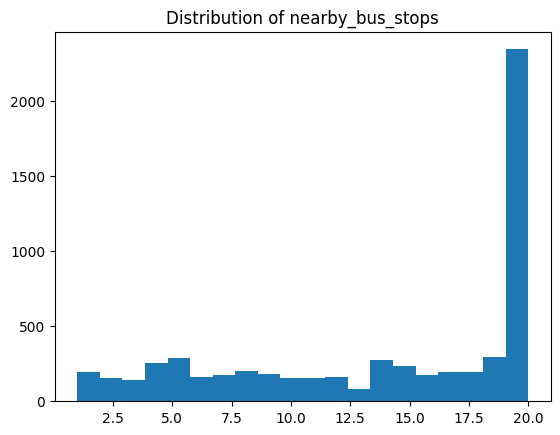

In [11]:
# Check the distribution of the target variable
bus_stop = train_df['nearby_bus_stops']

plt.hist(bus_stop, bins=20)
plt.title('Distribution of nearby_bus_stops')

In [12]:
# this feature is independent and the missing value seem random.
# fillna with multiple imputation method, using IterativeImputer. This aim to keep the distribution of the feature as close to the original as possible

missing_bus = train_df['nearby_bus_stops']
missing_bus = pd.DataFrame(missing_bus)

imputer = IterativeImputer(max_iter=100)
imputed_bus = imputer.fit_transform(missing_bus)
imputed_bus = pd.DataFrame(imputed_bus, columns=['nearby_bus_stops'])
train_df['nearby_bus_stops'] = imputed_bus


#### distribution is similar to before fill-in

##### land_area null treatment
There are 65% of record in this column are missing. Filling the gap here may have impact on model.

In [13]:
# Explore the statistics of the numerical features
train_df['land_area'].describe()

count      4917.000000
mean        242.963596
std        3083.223006
min          16.000000
25%          80.000000
50%         116.000000
75%         212.000000
max      137664.000000
Name: land_area, dtype: float64

In [14]:
# Check if land_area is missing at random or not
train_df['property_type'][train_df['land_area'].isnull()].value_counts()

property_type
Condo             9206
Townhouse           93
Detached House      55
Name: count, dtype: int64

<Axes: ylabel='land_area'>

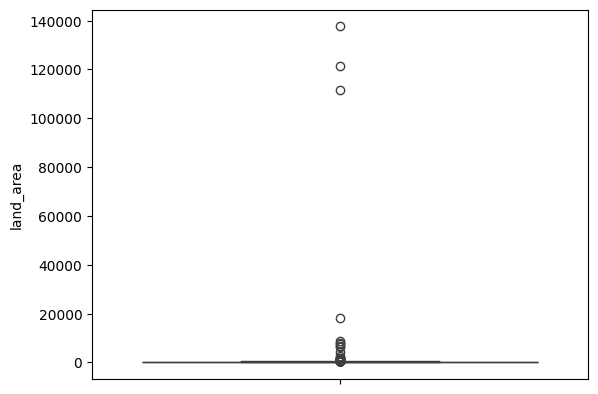

In [15]:
# Explore the distribution
sns.boxplot(train_df['land_area'])
# big outliers found

In [16]:
# Explore the outliers, set the upper bound to 2 standard deviation.
right_bound=train_df['land_area'].mean() + (train_df['land_area'].std()*2)

train_df['land_area'][train_df['land_area']>right_bound].value_counts()



land_area
121600.0    1
8800.0      1
7420.0      1
111680.0    1
6608.0      1
137664.0    1
8072.0      1
18228.0     1
Name: count, dtype: int64

In [17]:
# only 8 out of 14,271 rows is above 2 standard deviations. Consider replace them with mean(without these outliers)
train_df['land_area'][train_df['land_area']<=right_bound].mean()


157.78773680994092

In [18]:
# replace the outlier in land_area with mean
train_df['land_area'] = train_df['land_area'].apply(lambda x: train_df['land_area'][train_df['land_area']<=right_bound].mean() if x>right_bound else x)

<Axes: xlabel='land_area', ylabel='Count'>

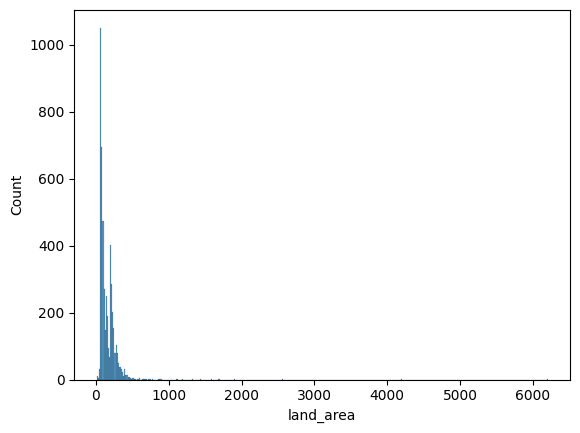

In [19]:
sns.histplot(train_df['land_area'])

###### Even without 2xstd the distribution is strongly skewed to the right
The missing value is still a majority of the data. I'll apple Nearest Neighbor Imputation to fill in the null. This is to keep the distribution as close to what we have as possible

##### Nearest Neighbour didn't give good result, mean is totally different from existing daat

Try Multiple Imputation method

In [20]:
# Fill in missing values with multiple imputation method, using IterativeImputer. This aim to keep the distribution of the feature as close to the original as possible

missing_land = train_df['land_area']
missing_land = pd.DataFrame(missing_land)

imputer = IterativeImputer(max_iter=100)
imputed_land = imputer.fit_transform(missing_land)
imputed_land = pd.DataFrame(imputed_land, columns=['land_area'])



In [21]:
# bring the flled data back to the dataframe
train_df['land_area'] = imputed_land

In [22]:
# Explore the description after filling the missing values
train_df['land_area'].describe()

count    14271.000000
mean       157.787737
std         90.507224
min         16.000000
25%        157.787737
50%        157.787737
75%        157.787737
max       6204.000000
Name: land_area, dtype: float64

##### Total_unit null treatment

In [23]:
train_df[train_df['total_units'].isnull()] # looks completely random

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,NaN,3.0,3.0,170,NaN,248.0,13.821687,100.428438,0,0,14.049426,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,NaN,72.0,13.865849,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",14.049426,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000
7,10615656,Bangkok,Sai Mai,Sai Mai,สายไหม 15,Townhouse,NaN,2.0,2.0,105,NaN,72.0,13.902303,100.643220,0,0,14.049426,6.0,6,0,None,[Covered car park],1990000
11,10922676,Samut Prakan,Mueang Samut Prakan,Thepharak,Thepharak,Townhouse,NaN,3.0,3.0,108,NaN,132.0,13.630977,100.616840,0,0,14.049426,13.0,6,0,None,[24 hours security],3230000
12,10892608,Bangkok,Prawet,Dok Mai,Dok Mai,Townhouse,NaN,4.0,2.0,117,NaN,76.0,13.675937,100.694063,0,0,3.000000,1.0,4,0,None,[],3600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14257,10993588,Samut Prakan,Bang Phli,Bang Phli Yai,Bang Phli Yai,Townhouse,NaN,4.0,2.0,100,NaN,84.0,13.592813,100.705234,0,0,1.000000,7.0,10,0,None,[],2350000
14262,11001883,Nonthaburi,Bang Yai,Sao Thong Hin,Sao Thong Hin,Detached House,NaN,2.0,2.0,144,NaN,144.0,13.871294,100.411563,1,"[[PP03 Sam Yaek Bang Yai MRT, 940]]",14.049426,16.0,20,0,None,[],2990000
14264,10887033,Bangkok,Khlong Sam Wa,Sam Wa Tawan Tok,พระยาสุเรนทร์30,Detached House,NaN,3.0,2.0,175,NaN,224.0,13.892922,100.704151,0,0,14.049426,1.0,3,0,None,"[Adult Fitness Stations, Children's Playground...",5390000
14267,11031178,Nonthaburi,Bang Bua Thong,Phimon Rat,Phimonrat,Townhouse,NaN,3.0,2.0,85,1.0,72.0,13.934188,100.359562,0,0,14.049426,4.0,3,0,None,[],1790000


In [24]:
# apply multiple imputation method to fillna in total_units
missing_unit = train_df['total_units']
missing_unit = pd.DataFrame(missing_unit)

imputer = IterativeImputer(max_iter=1000)
imputed_unit = imputer.fit_transform(missing_unit)
imputed_unit = pd.DataFrame(imputed_unit, columns=['total_units'])
train_df['total_units'] = imputed_unit

##### floor_level null treatment

In [25]:
train_df[train_df['floor_level'].isnull()].head(10) # looks completely random

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,712.655438,3.0,3.0,170,NaN,248.000000,13.821687,100.428438,0,0,14.049426,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,712.655438,3.0,2.0,120,NaN,72.000000,13.865849,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",14.049426,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000
7,10615656,Bangkok,Sai Mai,Sai Mai,สายไหม 15,Townhouse,712.655438,2.0,2.0,105,NaN,72.000000,13.902303,100.643220,0,0,14.049426,6.0,6,0,None,[Covered car park],1990000
11,10922676,Samut Prakan,Mueang Samut Prakan,Thepharak,Thepharak,Townhouse,712.655438,3.0,3.0,108,NaN,132.000000,13.630977,100.616840,0,0,14.049426,13.0,6,0,None,[24 hours security],3230000
12,10892608,Bangkok,Prawet,Dok Mai,Dok Mai,Townhouse,712.655438,4.0,2.0,117,NaN,76.000000,13.675937,100.694063,0,0,3.000000,1.0,4,0,None,[],3600000
13,10720889,Nonthaburi,Bang Bua Thong,Phimon Rat,Phimonrat,Townhouse,712.655438,4.0,3.0,110,NaN,128.000000,13.915387,100.398484,0,0,14.049426,7.0,7,0,None,"[Covered car park, Children's Playground, Comm...",2900000
17,10906912,Bangkok,Suan Luang,Suan Luang,Ramkhamhaeng Road,Condo,1003.000000,1.0,1.0,23,NaN,157.787737,13.743283,100.603216,1,"[[A5 Ramkhamhaeng Airport Link, 390]]",14.049426,9.0,8,2018,January,"[BBQ pits, Car Park, Covered car park, CCTV, F...",1780000
18,10540762,Bangkok,Watthana,Khlong Tan Nuea,32/2 Sukhumvit 39 Road,Condo,135.000000,1.0,1.0,44,NaN,157.787737,13.740195,100.578250,0,0,20.000000,18.0,20,2015,August,"[Car Park, Covered car park, CCTV, Fitness cor...",6300000
19,10980009,Bangkok,Bang Rak,Si Phraya,Si Phraya Road,Condo,384.000000,1.0,1.0,52,NaN,157.787737,13.731228,100.522126,1,"[[BL27 Sam Yan MRT, 830]]",14.049426,13.0,20,2023,None,"[Car Park, CCTV, Fitness corner, Jacuzzi, Meet...",5950000
25,10848712,Bangkok,Watthana,Khlong Tan Nuea,175-179 Soi Sukhumvit 39 Sukhumvit Road,Condo,500.000000,2.0,1.0,119,NaN,157.787737,13.743154,100.573438,0,0,20.000000,12.0,13,1994,April,"[Car Park, CCTV, Gymnasium room, Lift lobby, 2...",7200000


In [26]:
# apply multiple imputation method to fillna in total_units
missing_level = train_df['floor_level']
missing_level = pd.DataFrame(missing_level)

imputer = IterativeImputer(max_iter=1000)
imputed_level = imputer.fit_transform(missing_level)
imputed_level = pd.DataFrame(imputed_level, columns=['floor_level'])
train_df['floor_level'] = imputed_level

In [27]:
train_df['floor_level'].describe()

count    14271.000000
mean        11.322995
std          6.826151
min          1.000000
25%          7.000000
50%         11.322995
75%         11.322995
max         55.000000
Name: floor_level, dtype: float64

##### month_built null treatment

In [28]:
train_df[train_df['month_built'].isnull()] # looks completely random

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,712.655438,3.0,3.0,170,11.322995,248.0,13.821687,100.428438,0,0,14.049426,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,712.655438,3.0,2.0,120,11.322995,72.0,13.865849,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",14.049426,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000
7,10615656,Bangkok,Sai Mai,Sai Mai,สายไหม 15,Townhouse,712.655438,2.0,2.0,105,11.322995,72.0,13.902303,100.643220,0,0,14.049426,6.0,6,0,None,[Covered car park],1990000
11,10922676,Samut Prakan,Mueang Samut Prakan,Thepharak,Thepharak,Townhouse,712.655438,3.0,3.0,108,11.322995,132.0,13.630977,100.616840,0,0,14.049426,13.0,6,0,None,[24 hours security],3230000
12,10892608,Bangkok,Prawet,Dok Mai,Dok Mai,Townhouse,712.655438,4.0,2.0,117,11.322995,76.0,13.675937,100.694063,0,0,3.000000,1.0,4,0,None,[],3600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14262,11001883,Nonthaburi,Bang Yai,Sao Thong Hin,Sao Thong Hin,Detached House,712.655438,2.0,2.0,144,11.322995,144.0,13.871294,100.411563,1,"[[PP03 Sam Yaek Bang Yai MRT, 940]]",14.049426,16.0,20,0,None,[],2990000
14264,10887033,Bangkok,Khlong Sam Wa,Sam Wa Tawan Tok,พระยาสุเรนทร์30,Detached House,712.655438,3.0,2.0,175,11.322995,224.0,13.892922,100.704151,0,0,14.049426,1.0,3,0,None,"[Adult Fitness Stations, Children's Playground...",5390000
14267,11031178,Nonthaburi,Bang Bua Thong,Phimon Rat,Phimonrat,Townhouse,712.655438,3.0,2.0,85,1.000000,72.0,13.934188,100.359562,0,0,14.049426,4.0,3,0,None,[],1790000
14268,10945909,Bangkok,Saphan Sung,Saphan Sung,Soi Ramkhamhaeng 164,Detached House,300.000000,3.0,3.0,170,11.322995,260.0,13.791162,100.712196,0,0,20.000000,11.0,5,0,None,"[Clubhouse, Community Garden, CCTV, 24 hours s...",4550000


In [29]:
# convert month_built from month to number 1 -12 for every month
train_df['month_built'] = train_df['month_built'].replace('December', 12)
train_df['month_built'] = train_df['month_built'].replace('November', 11)
train_df['month_built'] = train_df['month_built'].replace('October', 10)
train_df['month_built'] = train_df['month_built'].replace('September', 9)
train_df['month_built'] = train_df['month_built'].replace('August', 8)
train_df['month_built'] = train_df['month_built'].replace('July', 7)
train_df['month_built'] = train_df['month_built'].replace('June', 6)
train_df['month_built'] = train_df['month_built'].replace('May', 5)
train_df['month_built'] = train_df['month_built'].replace('April', 4)
train_df['month_built'] = train_df['month_built'].replace('March', 3)
train_df['month_built'] = train_df['month_built'].replace('February', 2)
train_df['month_built'] = train_df['month_built'].replace('January', 1)


In [30]:
# apply simple impuation, replace null with mode
mode_month = train_df['month_built'].mode()
train_df['month_built'] = train_df['month_built'].fillna(mode_month[0])


In [31]:
train_df['month_built'].value_counts()

month_built
6.0     7442
12.0    1529
1.0     1357
7.0      783
3.0      617
2.0      492
9.0      490
8.0      423
10.0     370
5.0      320
4.0      292
11.0     156
Name: count, dtype: int64

##### nearby_supermarkets null treatment

In [32]:
train_df[train_df['nearby_supermarkets'].isnull()] # looks completely random

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,floor_level,land_area,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
75,10659807,Bangkok,Min Buri,Saen Saep,สุวินทวงศ์,Detached House,712.655438,3.0,3.0,220,11.322995,296.000000,13.815812,100.750812,0,0,11.000000,NaN,3,0,6.0,"[Covered car park, Clubhouse, Jacuzzi, Playgro...",6200000
133,10731556,Samut Prakan,Bang Phli,Racha Thewa,กิ่งแก้ว,Townhouse,712.655438,3.0,2.0,113,11.322995,72.000000,13.699687,100.715563,0,0,14.049426,NaN,2,0,6.0,"[Community Garden, CCTV, 24 hours security]",1900000
144,10976865,Nonthaburi,Mueang Nonthaburi,Sai Ma,Soi Sai Ma 8,Detached House,52.000000,3.0,3.0,175,11.322995,224.000000,13.856773,100.474932,0,0,14.049426,NaN,1,2020,12.0,"[Car Park, Community Garden, CCTV, Fitness cor...",7000000
175,10754080,Bangkok,Sai Mai,O Ngoen,Chatuchot Road,Detached House,291.000000,4.0,4.0,200,11.322995,248.000000,13.898603,100.686677,0,0,14.049426,NaN,1,2017,6.0,"[Clubhouse, CCTV, Fitness corner, 24 hours sec...",6290000
178,11017345,Samut Prakan,Phra Samut Jadee,Nai Khlong Bang Pla Kot,Nai Khlong Bang Pla Kot,Townhouse,712.655438,3.0,2.0,66,11.322995,68.000000,13.585693,100.540862,0,0,14.049426,NaN,1,0,6.0,[],1350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14126,10563946,Bangkok,Lat Krabang,Khlong Sam Prawet,98/23 ร่มเกล้า,Townhouse,712.655438,2.0,4.0,325,3.000000,200.000000,13.746792,100.777442,0,0,8.000000,NaN,2,0,6.0,"[Covered car park, 24 hours security]",8690000
14163,10837048,Nonthaburi,Bang Bua Thong,Lahan,Soi Wiroj Ville Village,Townhouse,144.000000,2.0,2.0,100,2.000000,80.000000,13.945817,100.429959,0,0,14.049426,NaN,2,0,6.0,[24 hours security],1690000
14166,11033972,Bangkok,Khlong Sam Wa,Sam Wa Tawan Tok,Kanjanapisek Klongsamwa,Detached House,80.000000,3.0,2.0,120,11.322995,228.000000,13.904547,100.697802,0,0,14.049426,NaN,2,2022,1.0,"[Clubhouse, Community Garden, CCTV, Fitness co...",6900000
14185,10868401,Nonthaburi,Mueang Nonthaburi,Bang Khen,"107, 109 Moo 9, Soi Duangmanee, Ngamwongwan Road",Condo,366.000000,2.0,2.0,48,2.000000,157.787737,13.844599,100.529109,0,0,5.000000,NaN,1,2014,7.0,"[Car Park, Community Garden, CCTV, Fitness cor...",1800000


<Axes: xlabel='nearby_supermarkets', ylabel='Count'>

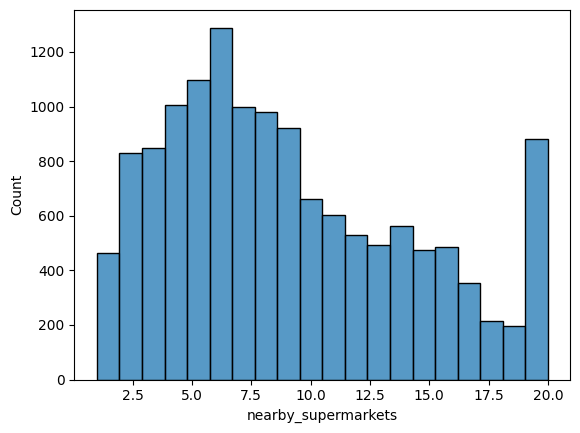

In [33]:
sns.histplot(train_df['nearby_supermarkets'],bins=20) # looks like skewed to the right

In [34]:
missing_super = train_df['nearby_supermarkets']
missing_super = pd.DataFrame(missing_super)

imputer = IterativeImputer(max_iter=1000)
imputed_super = np.round(imputer.fit_transform(missing_super))
imputed_super = pd.DataFrame(imputed_super, columns=['nearby_supermarkets'])
train_df['nearby_supermarkets'] = imputed_super

<Axes: xlabel='nearby_supermarkets', ylabel='Count'>

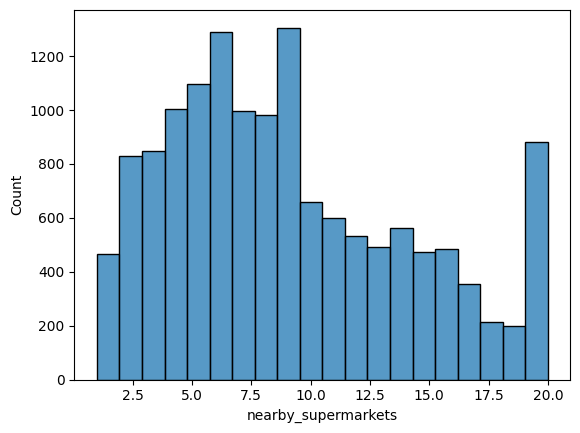

In [35]:
sns.histplot(train_df['nearby_supermarkets'],bins=20)

In [36]:
train_df['nearby_supermarkets'].describe()

count    14271.000000
mean         9.002102
std          5.275174
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max         20.000000
Name: nearby_supermarkets, dtype: float64

##### bedrooms and baths null rows are very minimal, less than 1%, has no significant to overall data. will replace with mean

In [37]:
mean_bed = train_df['bedrooms'].mean()
mean_bath = train_df['baths'].mean()
train_df['bedrooms'] = train_df['bedrooms'].fillna(mean_bed)
train_df['baths'] = train_df['baths'].fillna(mean_bath)

#### Subdistrict null treatment

In [38]:
train_df['subdistrict'].unique()

array(['Phra Khanong Nuea', 'Khlong Toei Nuea', 'Khlong Tan',
       'Bang Khun Kong', 'Bang Phai', 'Si Phraya', 'Pak Kret', 'Sai Mai',
       'Khlong Tan Nuea', 'Lumphini', 'Lat Yao', 'Thepharak', 'Dok Mai',
       'Phimon Rat', 'Chom Phon', 'Huai Khwang', 'Bang Chak',
       'Suan Luang', 'Wat Tha Phra', 'Nuan Chan', 'Khlong Kum',
       'Khlong Chan', 'Phra Khanong', 'Bang Khen', 'Nong Khaem',
       'Samrong Nuea', 'Bang Pla', 'Ram Inthra',
       'Nai Khlong Bang Pla Kot', 'Bang Rak Phatthana', 'Bang Kaeo',
       'Bang Len', 'Pak Nam', 'Sao Thong Hin', 'Sam Sen Nai',
       'Sena Nikhom', 'Sisa Chorakhe Noi', 'Saphan Sung', 'O Ngoen',
       'Maha Sawat', 'Khlong Kluea', 'Din Daeng', 'Si Kan',
       'Nong Khang Phlu', 'Makkasan', 'Bang Khu Rat', 'Bukkhalo',
       'Talat Khwan', 'Noble Revolve Ratchada', 'Bang Yi Khan',
       'Saen Saep', 'Bang Kraso', 'Thung Song Hong', 'Bang Chan',
       'Plai Bang', 'Bang Bua Thong', 'Chong Nonsi', 'Vio Khaerai 2',
       'Bang Phlap', 'Sai

In [39]:
# Subdistrict null is only 11 out of 14,xxx row. replace them with district
train_df['subdistrict'] = train_df['subdistrict'].fillna(train_df['district'])

### Train data is now has no null

---

## Futher EDA

In [40]:
train_df.dtypes

id                           int64
province                    object
district                    object
subdistrict                 object
address                     object
property_type               object
total_units                float64
bedrooms                   float64
baths                      float64
floor_area                   int64
floor_level                float64
land_area                  float64
latitude                   float64
longitude                  float64
nearby_stations              int64
nearby_station_distance     object
nearby_bus_stops           float64
nearby_supermarkets        float64
nearby_shops                 int64
year_built                   int64
month_built                float64
facilities                  object
price                        int64
dtype: object

#### convert property type to number

In [41]:
train_df['property_type'].unique()
# There are 3 types.

array(['Condo', 'Detached House', 'Townhouse'], dtype=object)

In [42]:
# Dummyfied property_type
train_df = pd.get_dummies(train_df, columns=['property_type'], drop_first=True, dtype=int) 

##### Convert facility to number of item. treat them all equally

In [43]:
# convert facilities to number of facilities
train_df['facilities'] = train_df['facilities'].apply(lambda x: len(x))


#### Convert province to number

In [44]:
# dummyfied province
train_df = pd.get_dummies(train_df, columns=['province'], drop_first=True, dtype=int)

#### Convert district to number (dummyfied)

In [45]:
# dummyfied district
train_df = pd.get_dummies(train_df, columns=['district'], drop_first=True, dtype=int)

### correlation between data

In [46]:
# check the correlation between numerical features
corr = train_df.corr(numeric_only=True)

# plt.figure(figsize=(20,20))
# sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

---

## Modelling

##### Prepare data X and y

In [47]:
train_df.columns

Index(['id', 'subdistrict', 'address', 'total_units', 'bedrooms', 'baths',
       'floor_area', 'floor_level', 'land_area', 'latitude', 'longitude',
       'nearby_stations', 'nearby_station_distance', 'nearby_bus_stops',
       'nearby_supermarkets', 'nearby_shops', 'year_built', 'month_built',
       'facilities', 'price', 'property_type_Detached House',
       'property_type_Townhouse', 'province_Nonthaburi',
       'province_Samut Prakan', 'district_Bang Bon', 'district_Bang Bua Thong',
       'district_Bang Kapi', 'district_Bang Khae', 'district_Bang Khen',
       'district_Bang Kho Laem', 'district_Bang Khun Thian',
       'district_Bang Kruai', 'district_Bang Na', 'district_Bang Phlat',
       'district_Bang Phli', 'district_Bang Rak', 'district_Bang Sao Thong',
       'district_Bang Sue', 'district_Bang Yai', 'district_Bangkok Noi',
       'district_Bangkok Yai', 'district_Bueng Kum', 'district_Chatuchak',
       'district_Chom Thong', 'district_Din Daeng', 'district_Don Mueang

In [48]:
# Create X and y for modeling
X = train_df.drop(columns=['id', 'subdistrict', 'address', 
       'latitude', 'longitude',
       'nearby_station_distance',
       'price'])
y = train_df['price']

In [49]:
X.head()

,total_units,bedrooms,baths,floor_area,floor_level,land_area,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,property_type_Detached House,property_type_Townhouse,province_Nonthaburi,province_Samut Prakan,district_Bang Bon,district_Bang Bua Thong,district_Bang Kapi,district_Bang Khae,district_Bang Khen,district_Bang Kho Laem,district_Bang Khun Thian,district_Bang Kruai,district_Bang Na,district_Bang Phlat,district_Bang Phli,district_Bang Rak,district_Bang Sao Thong,district_Bang Sue,district_Bang Yai,district_Bangkok Noi,district_Bangkok Yai,district_Bueng Kum,district_Chatuchak,district_Chom Thong,district_Din Daeng,district_Don Mueang,district_Huai Khwang,district_Khan Na Yao,district_Khlong Sam Wa,district_Khlong San,district_Khlong Toei,district_Lak Si,district_Lat Krabang,district_Lat Phrao,district_Min Buri,district_Mueang Nonthaburi,district_Mueang Samut Prakan,district_Nong Chok,district_Nong Khaem,district_Pak Kret,district_Pathum Wan,district_Phasi Charoen,district_Phaya Thai,district_Phra Khanong,district_Phra Pradaeng,district_Phra Samut Jadee,district_Prawet,district_Rat Burana,district_Ratchathewi,district_Sai Mai,district_Sai Noi,district_Saphan Sung,district_Sathon,district_Suan Luang,district_Taling Chan,district_Thawi Watthana,district_Thon Buri,district_Thung Khru,district_Wang Thonglang,district_Watthana,district_Yan Nawa
0,273.000000,2.0,2.0,66,10.000000,157.787737,2,14.049426,16.0,20,2011,6.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,74.000000,1.0,1.0,49,8.000000,157.787737,3,14.049426,11.0,20,2012,9.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,940.000000,1.0,1.0,34,4.000000,157.787737,2,14.049426,20.0,20,2017,1.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,712.655438,3.0,3.0,170,11.322995,248.000000,0,14.049426,2.0,4,0,6.0,4,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,712.655438,3.0,2.0,120,11.322995,72.000000,1,14.049426,6.0,15,0,6.0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
print(X.shape)
print(y.shape)

(14271, 74)
(14271,)


In [51]:
y.describe()

count    1.427100e+04
mean     4.044124e+06
std      2.179909e+06
min      4.800000e+05
25%      2.250000e+06
50%      3.500000e+06
75%      5.500000e+06
max      9.999000e+06
Name: price, dtype: float64

In [52]:
# Standardize X
ss = StandardScaler()
X_scaled = ss.fit_transform(X)


In [53]:
# split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, random_state=42)

## Linear regression

In [54]:
# instantiate linear model
lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

In [55]:
GridSearchCV.get_params(lr)


model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]})

### Evaluate model

R square

In [56]:
# obtain the r2 score from Train and test
print(f'Train R2 score: {grid.score(X_train, y_train)}')
print(f'Test R2 score: {grid.score(X_test, y_test)}')

Train R2 score: 0.649636042481146
Test R2 score: 0.6732210483700771


RMSE

In [57]:
# obtain the RMSE from Train and test
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, lr.predict(X_train)))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))}')

Train RMSE: 1284919.3037139883
Test RMSE: 1261480.9860784337


Cross-Validation

In [58]:
# Cross validation score using 5 folds
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.6427505238120312

Residual Analysis

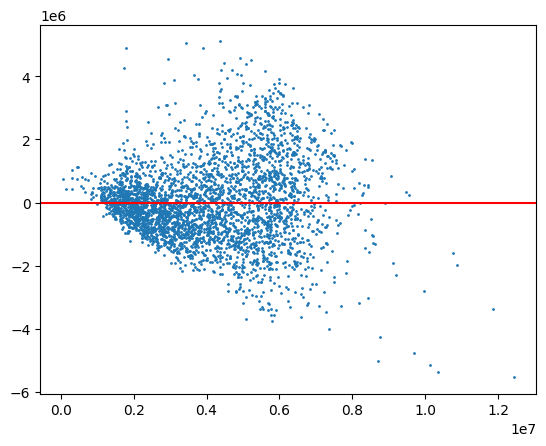

In [59]:
# check the residual plot
residual = y_test - lr.predict(X_test)

plt.scatter(lr.predict(X_test), residual, s=1)
plt.axhline(0, color = 'red')

In [60]:
X.head()

,total_units,bedrooms,baths,floor_area,floor_level,land_area,nearby_stations,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,property_type_Detached House,property_type_Townhouse,province_Nonthaburi,province_Samut Prakan,district_Bang Bon,district_Bang Bua Thong,district_Bang Kapi,district_Bang Khae,district_Bang Khen,district_Bang Kho Laem,district_Bang Khun Thian,district_Bang Kruai,district_Bang Na,district_Bang Phlat,district_Bang Phli,district_Bang Rak,district_Bang Sao Thong,district_Bang Sue,district_Bang Yai,district_Bangkok Noi,district_Bangkok Yai,district_Bueng Kum,district_Chatuchak,district_Chom Thong,district_Din Daeng,district_Don Mueang,district_Huai Khwang,district_Khan Na Yao,district_Khlong Sam Wa,district_Khlong San,district_Khlong Toei,district_Lak Si,district_Lat Krabang,district_Lat Phrao,district_Min Buri,district_Mueang Nonthaburi,district_Mueang Samut Prakan,district_Nong Chok,district_Nong Khaem,district_Pak Kret,district_Pathum Wan,district_Phasi Charoen,district_Phaya Thai,district_Phra Khanong,district_Phra Pradaeng,district_Phra Samut Jadee,district_Prawet,district_Rat Burana,district_Ratchathewi,district_Sai Mai,district_Sai Noi,district_Saphan Sung,district_Sathon,district_Suan Luang,district_Taling Chan,district_Thawi Watthana,district_Thon Buri,district_Thung Khru,district_Wang Thonglang,district_Watthana,district_Yan Nawa
0,273.000000,2.0,2.0,66,10.000000,157.787737,2,14.049426,16.0,20,2011,6.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,74.000000,1.0,1.0,49,8.000000,157.787737,3,14.049426,11.0,20,2012,9.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,940.000000,1.0,1.0,34,4.000000,157.787737,2,14.049426,20.0,20,2017,1.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,712.655438,3.0,3.0,170,11.322995,248.000000,0,14.049426,2.0,4,0,6.0,4,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,712.655438,3.0,2.0,120,11.322995,72.000000,1,14.049426,6.0,15,0,6.0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Linear Model summary
- not over-fit
- Train-Test score looks okay, but not high
- Cross validation result confirm it generalized (not over-fit)
- Residual also seem balance

## Ridge regularization

In [61]:
# instantiate RidgeCV
ridge = RidgeCV(alphas=10)

# fit the model
ridge.fit(X_train, y_train)

RidgeCV(alphas=10)

In [62]:
# obtain the r2 score from Train and test
print(f'Train R2 score: {ridge.score(X_train, y_train)}')
print(f'Test R2 score: {ridge.score(X_test, y_test)}')

Train R2 score: 0.6497076551582728
Test R2 score: 0.6733560095881042


In [63]:
# obtain the RMSE from Train and test
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, ridge.predict(X_train)))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))}')

Train RMSE: 1284787.9813966271
Test RMSE: 1261220.4604359553


In [64]:
# Cross validation score using 5 folds
cross_val_score(ridge, X_train, y_train, cv=5).mean()

0.642849007685546

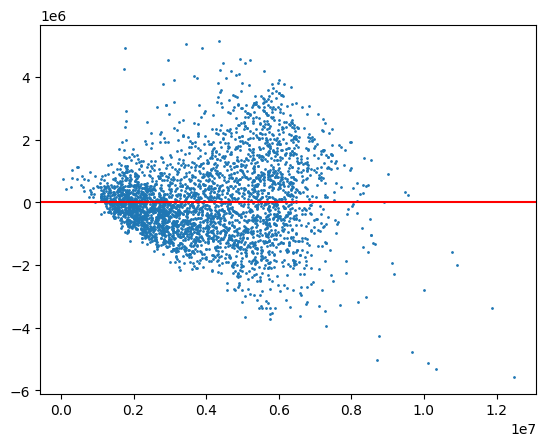

In [65]:
# check the residual plot
residual = y_test - ridge.predict(X_test)

plt.scatter(ridge.predict(X_test), residual, s=1)
plt.axhline(0, color = 'red')

## Lasso regularization

In [66]:
# instantiate RidgeCV
l_alphas = np.logspace(-3, 0, 100)
lasso = LassoCV(alphas = l_alphas, cv=5, max_iter=10000);

# fit the model
lasso.fit(X_train, y_train) 

C:\Users\ponpa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1548520693310214.0, tolerance: 4035109575773.071
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ponpa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1384115936700460.0, tolerance: 4035109575773.071
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ponpa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 921909761632976.0, tolerance: 4035109575773.071
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ponpa\AppData\Roaming\Pyth

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5, max_iter=10000)

In [67]:
# obtain the r2 score from Train and test
print(f'Train R2 score: {lasso.score(X_train, y_train)}')
print(f'Test R2 score: {lasso.score(X_test, y_test)}')

Train R2 score: 0.6497089685836148
Test R2 score: 0.6734060273913136


In [68]:
# obtain the RMSE from Train and test
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))}')

Train RMSE: 1284785.5727304078
Test RMSE: 1261123.8936939267


In [69]:
# Cross validation score using 5 folds
cross_val_score(lasso, X_train, y_train, cv=5).mean()

C:\Users\ponpa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1240584449645810.0, tolerance: 3241224753855.324
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ponpa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 875079367986058.0, tolerance: 3241224753855.324
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ponpa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 875076771853214.0, tolerance: 3241224753855.324
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ponpa\AppData\Roaming\Pytho

0.6428342907409098

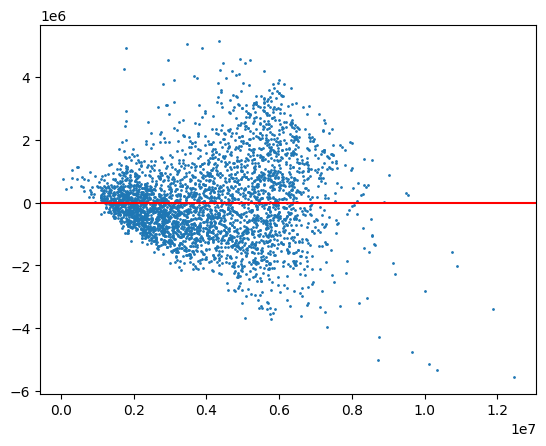

In [70]:
# check the residual plot
residual = y_test - lasso.predict(X_test)

plt.scatter(lasso.predict(X_test), residual, s=1)
plt.axhline(0, color = 'red')

## Elastic Net regularization

In [71]:
#instantiate ElasticNetCV

# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio. (What does this do?)
enet_ratio = np.linspace(0.2, 0.8, 100)

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train, y_train)

In [72]:
# obtain the r2 score from Train and test
print(f'Train R2 score: {enet_model.score(X_train, y_train)}')
print(f'Test R2 score: {enet_model.score(X_test, y_test)}')

Train R2 score: 0.6441433776193513
Test R2 score: 0.664243278888363


In [73]:
# obtain the RMSE from Train and test
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, enet_model.predict(X_train)))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, enet_model.predict(X_test)))}')

Train RMSE: 1294951.992592865
Test RMSE: 1278692.237899784


In [74]:
# Cross validation score using 5 folds
cross_val_score(enet_model, X_train, y_train, cv=5).mean()

0.6382805025605371

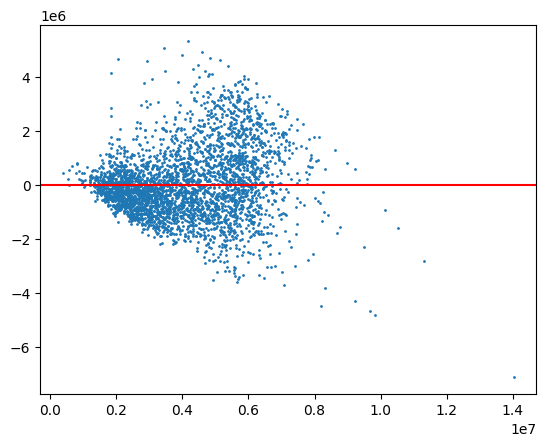

In [75]:
# check the residual plot
residual = y_test - enet_model.predict(X_test)

plt.scatter(enet_model.predict(X_test), residual, s=1)
plt.axhline(0, color = 'red')

-----

### TEST model with actual data

Import prepared data

In [76]:
test_df = pd.read_json('../data/test.json')

In [77]:
# Fill in missing values with 0
test_df['nearby_station_distance'] = test_df['nearby_station_distance'].fillna(0)

In [78]:
# fillna with multiple imputation method, using IterativeImputer. This aim to keep the distribution of the feature as close to the original as possible

missing_bus = test_df['nearby_bus_stops']
missing_bus = pd.DataFrame(missing_bus)

imputer = IterativeImputer(max_iter=100)
imputed_bus = imputer.fit_transform(missing_bus)
imputed_bus = pd.DataFrame(imputed_bus, columns=['nearby_bus_stops'])
test_df['nearby_bus_stops'] = imputed_bus

In [79]:
# replace the outlier in land_area with mean
right_bound=test_df['land_area'].mean() + (test_df['land_area'].std()*2)
test_df['land_area'] = test_df['land_area'].apply(lambda x: test_df['land_area'][test_df['land_area']<=right_bound].mean() if x>right_bound else x)

In [80]:
# Fill in missing values with multiple imputation method, using IterativeImputer. This aim to keep the distribution of the feature as close to the original as possible

missing_land = test_df['land_area']
missing_land = pd.DataFrame(missing_land)

imputer = IterativeImputer(max_iter=100)
imputed_land = imputer.fit_transform(missing_land)
imputed_land = pd.DataFrame(imputed_land, columns=['land_area'])
test_df['land_area'] = imputed_land

In [81]:
# apply multiple imputation method to fillna in total_units
missing_unit = test_df['total_units']
missing_unit = pd.DataFrame(missing_unit)

imputer = IterativeImputer(max_iter=1000)
imputed_unit = imputer.fit_transform(missing_unit)
imputed_unit = pd.DataFrame(imputed_unit, columns=['total_units'])
test_df['total_units'] = imputed_unit

In [82]:
# apply multiple imputation method to fillna in total_units
missing_level = test_df['floor_level']
missing_level = pd.DataFrame(missing_level)

imputer = IterativeImputer(max_iter=1000)
imputed_level = imputer.fit_transform(missing_level)
imputed_level = pd.DataFrame(imputed_level, columns=['floor_level'])
test_df['floor_level'] = imputed_level

In [83]:
# convert month_built from month to number 1 -12 for every month
test_df['month_built'] = test_df['month_built'].replace('December', 12)
test_df['month_built'] = test_df['month_built'].replace('November', 11)
test_df['month_built'] = test_df['month_built'].replace('October', 10)
test_df['month_built'] = test_df['month_built'].replace('September', 9)
test_df['month_built'] = test_df['month_built'].replace('August', 8)
test_df['month_built'] = test_df['month_built'].replace('July', 7)
test_df['month_built'] = test_df['month_built'].replace('June', 6)
test_df['month_built'] = test_df['month_built'].replace('May', 5)
test_df['month_built'] = test_df['month_built'].replace('April', 4)
test_df['month_built'] = test_df['month_built'].replace('March', 3)
test_df['month_built'] = test_df['month_built'].replace('February', 2)
test_df['month_built'] = test_df['month_built'].replace('January', 1)

In [84]:
# apply simple impuation, replace null with mode
mode_month = test_df['month_built'].mode()
test_df['month_built'] = test_df['month_built'].fillna(mode_month[0])

In [85]:
# apply multiple imputation method to fillna in supermarket
missing_super = test_df['nearby_supermarkets']
missing_super = pd.DataFrame(missing_super)

imputer = IterativeImputer(max_iter=1000)
imputed_super = np.round(imputer.fit_transform(missing_super))
imputed_super = pd.DataFrame(imputed_super, columns=['nearby_supermarkets'])
test_df['nearby_supermarkets'] = imputed_super

In [86]:
# bedrooms and baths null rows are very minimal, less than 1%, has no significant to overall data. will replace with mean
mean_bed = test_df['bedrooms'].mean()
mean_bath = test_df['baths'].mean()
test_df['bedrooms'] = test_df['bedrooms'].fillna(mean_bed)
test_df['baths'] = test_df['baths'].fillna(mean_bath)

In [87]:
# Dummyfied property_type
test_df = pd.get_dummies(test_df, columns=['property_type'], drop_first=True, dtype=int)

In [88]:
# convert facilities to number of facilities
test_df['facilities'] = test_df['facilities'].apply(lambda x: len(x))

In [89]:
# dummyfied province
test_df = pd.get_dummies(test_df, columns=['province'], drop_first=True, dtype=int)

In [90]:
# dummyfied district
test_df = pd.get_dummies(test_df, columns=['district'], drop_first=True, dtype=int)

In [91]:
# Prepare X for prediction, from test_df
X_actual = test_df.drop(columns=['id', 'subdistrict', 'address', 
       'latitude', 'longitude',    
       'nearby_station_distance'])

In [92]:
# make sure columne in test and train are sme

for col in X.columns : # iterate all columns in train data
    if col not in X_actual.columns: # if the column is not in test data
        X_actual[col] = 0 # make the column filled with 0 values

X_actual = X_actual[X.columns] # drop "columns exist only in test data" and sort in the same order

In [93]:
X_actual.columns

Index(['total_units', 'bedrooms', 'baths', 'floor_area', 'floor_level',
       'land_area', 'nearby_stations', 'nearby_bus_stops',
       'nearby_supermarkets', 'nearby_shops', 'year_built', 'month_built',
       'facilities', 'property_type_Detached House', 'property_type_Townhouse',
       'province_Nonthaburi', 'province_Samut Prakan', 'district_Bang Bon',
       'district_Bang Bua Thong', 'district_Bang Kapi', 'district_Bang Khae',
       'district_Bang Khen', 'district_Bang Kho Laem',
       'district_Bang Khun Thian', 'district_Bang Kruai', 'district_Bang Na',
       'district_Bang Phlat', 'district_Bang Phli', 'district_Bang Rak',
       'district_Bang Sao Thong', 'district_Bang Sue', 'district_Bang Yai',
       'district_Bangkok Noi', 'district_Bangkok Yai', 'district_Bueng Kum',
       'district_Chatuchak', 'district_Chom Thong', 'district_Din Daeng',
       'district_Don Mueang', 'district_Huai Khwang', 'district_Khan Na Yao',
       'district_Khlong Sam Wa', 'district_Khlong

In [94]:
# standardize X
ss = StandardScaler()
X_act_scaled = ss.fit_transform(X_actual)

---

## Apply the model for prediction

#### Linear regression

In [95]:
X_act_scaled

array([[ 0.17448184,  1.99425572,  1.63986544, ..., -0.10448882,
        -0.24171277, -0.11915865],
       [-1.21792323,  1.99425572,  1.63986544, ..., -0.10448882,
        -0.24171277, -0.11915865],
       [-0.56291017, -0.7860896 , -0.70481727, ..., -0.10448882,
        -0.24171277, -0.11915865],
       ...,
       [ 0.81944869, -0.7860896 , -0.70481727, ..., -0.10448882,
        -0.24171277, -0.11915865],
       [ 0.0117332 , -0.7860896 , -0.70481727, ..., -0.10448882,
        -0.24171277, -0.11915865],
       [ 0.58436732, -0.7860896 , -0.70481727, ..., -0.10448882,
        -0.24171277, -0.11915865]])

In [96]:
ridge.predict(X_act_scaled)

array([5586100.78894229, 6714393.68325594, 4796164.34455815, ...,
       2808165.82056716, 1909609.94397509, 2589370.56250313])

In [97]:
# create dataframe for submission, with id from test_df and price from prediction
submission_ridge = pd.DataFrame({'id':test_df['id'], 'price':ridge.predict(X_act_scaled)})
submission_ridge.head()

,id,price
0,10317868,5.586101e+06
1,10885829,6.714394e+06
2,10765951,4.796164e+06
3,10003549,4.994812e+06
4,10663026,2.482189e+06


In [98]:
# export to csv
submission_ridge.to_csv('../data/submission_ridge.csv', index=False)

---

#### Polynomial regression - last trial

In [100]:
# create PolynomialFeatures
poly_2 = PolynomialFeatures(degree=2, include_bias = False)
X_new_poly = poly_2.fit_transform(X_scaled)


X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_new_poly,y, random_state=42)
poly_2 = LinearRegression()
poly_2.fit(X_train_poly, y_train_poly)

LinearRegression()

In [101]:
# obtain the r2 score from Train and test
print(f'Train R2 score: {poly_2.score(X_train_poly, y_train_poly)}')
print(f'Test R2 score: {poly_2.score(X_test_poly, y_test_poly)}')

Train R2 score: 0.8216536439409745
Test R2 score: -6368742760296114.0


In [102]:
# obtain the RMSE from Train and test
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, poly_2.predict(X_train_poly)))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, poly_2.predict(X_test_poly)))}')

Train RMSE: 916744.392652466
Test RMSE: 176108584010808.84


In [103]:
# Cross validation score using 5 folds
cross_val_score(poly_2, X_train_poly, y_train_poly, cv=5).mean()

-1.2940305507238797e+17

In [104]:
#instantiate RidgeCV
ridge_poly = RidgeCV(alphas=10000)
ridge_poly.fit(X_train_poly, y_train_poly)

RidgeCV(alphas=10000)

In [105]:
print(f'Train R2 score: {ridge_poly.score(X_train_poly, y_train_poly)}')
print(f'Test R2 score: {ridge_poly.score(X_test_poly, y_test_poly)}')

Train R2 score: 0.6600291343428143
Test R2 score: 0.5640046536571387


In [106]:
# obtain the RMSE from Train and test
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, ridge_poly.predict(X_train_poly)))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, ridge_poly.predict(X_test_poly)))}')

Train RMSE: 1265718.1057599667
Test RMSE: 1457117.5809693998


In [107]:
# Cross validation score using 5 folds
cross_val_score(ridge_poly, X_train_poly, y_train_poly, cv=5).mean()

0.6080671329300609

---

#### For interpretation


In [108]:
# finding coefficient of submission_ridge
ridge.coef_

# create dataframe of coefficient where the index is the column name of X_actual_scaled
ridge_coef = pd.DataFrame({'coef':ridge.coef_}, index=X_actual.columns)

In [109]:
# sort ridge_coef by coef value from large to small
ridge_coef.sort_values(by='coef', ascending=False, inplace=True)

ridge_coef.head(20)

,coef
baths,709123.725857
floor_area,586994.973986
district_Watthana,486853.474903
district_Khlong Toei,394647.593060
bedrooms,364832.488717
nearby_stations,345516.546739
property_type_Detached House,332139.796828
district_Bang Rak,296390.333898
facilities,288256.246153
district_Ratchathewi,268639.396417


In [110]:
# sort ridge_coef by coef value from small to large
ridge_coef.sort_values(by='coef', ascending=True, inplace=True)

ridge_coef.head(40)

,coef
province_Samut Prakan,-392894.660911
province_Nonthaburi,-254604.322847
district_Bang Bua Thong,-237857.920288
district_Khlong Sam Wa,-190005.615558
total_units,-189862.958773
district_Bang Yai,-145911.298757
property_type_Townhouse,-145400.710539
district_Thung Khru,-111026.174737
district_Bang Khen,-106855.095784
district_Nong Chok,-101770.381126
